<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Libraries used 
</span>
</span>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import chi2_contingency

<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Covariance and Correlation
</span>
<span style="font-size: 20px;">

Measure how two variables move together and how strongly they are related.
</span>
</span>


----- First 5 Rows -----
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  

----- Statistical Summary -----
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
2

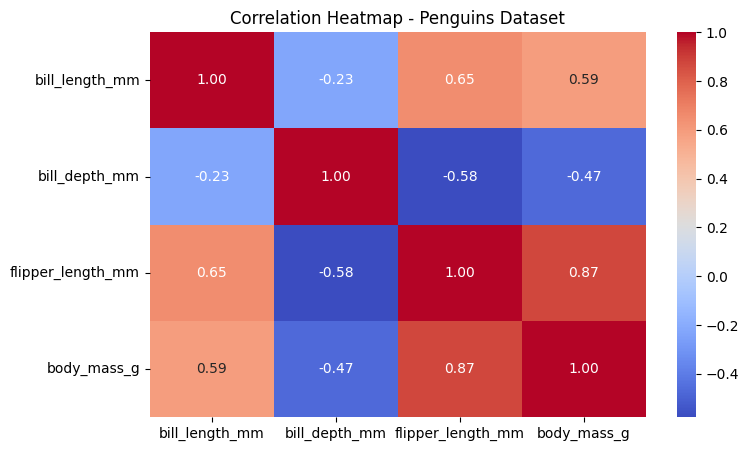

In [2]:
df = sns.load_dataset("penguins").dropna()  

print("\n----- First 5 Rows -----")
print(df.head())

print("\n----- Statistical Summary -----")
print(df.describe())

print("\n----- Covariance Matrix -----")
print(df.cov(numeric_only=True)) 

print("\n----- Correlation Matrix -----")
print(df.corr(numeric_only=True))

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Penguins Dataset")
plt.show()

Warm colors (red) = strong positive correlation (variables increase together). 

Cool colors (blue) = strong negative correlation (one increases while the other decreases). 

Lighter/neutral colors = weak or no correlation. 

<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Linear Regression
</span>
<span style="font-size: 20px;">

Models the relationship between one predictor and one outcome using a best-fit straight line.
</span>
</span>

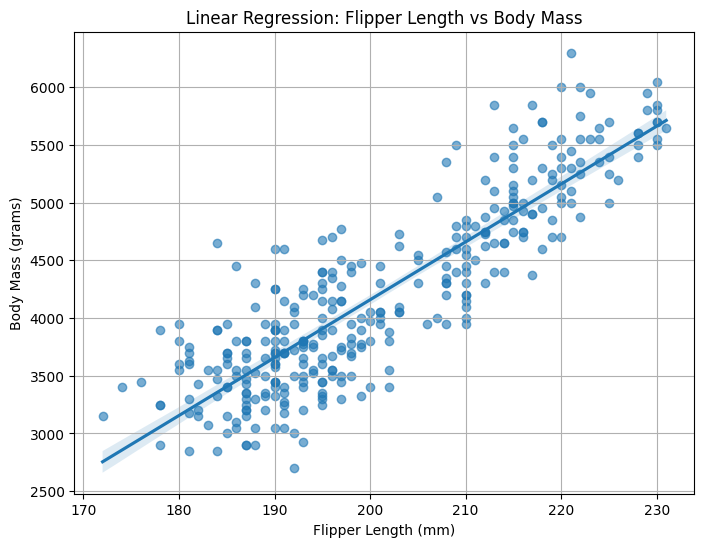

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          3.13e-105
Time:                        16:33:06   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

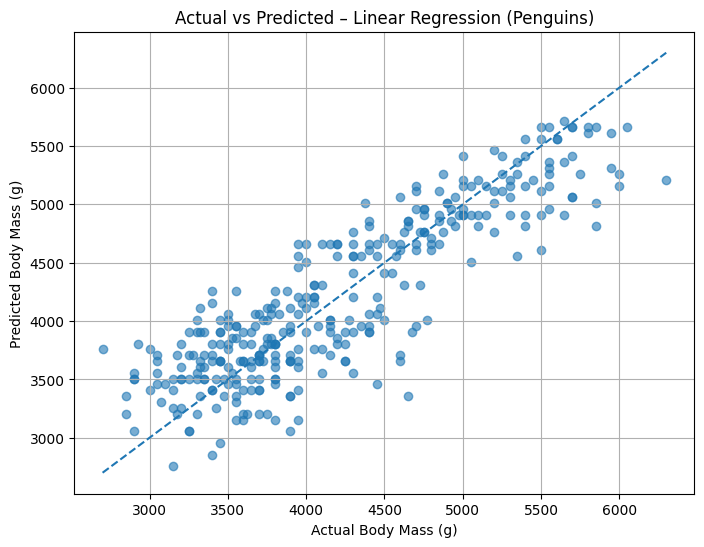

In [3]:
plt.figure(figsize=(8,6))
sns.regplot(
    x="flipper_length_mm",
    y="body_mass_g",
    data=df,
    scatter_kws={'alpha':0.6}
)

plt.title("Linear Regression: Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (grams)")
plt.grid(True)
plt.show()

X = df["flipper_length_mm"]
y = df["body_mass_g"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

y_pred = model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.title("Actual vs Predicted – Linear Regression (Penguins)")
plt.grid(True)

min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], '--')

plt.show()

<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Polynomial Regression of Degree 1,2,3 
</span>
</span>

## How well does the model fit the data

R-squared value: 0.7620921573403914


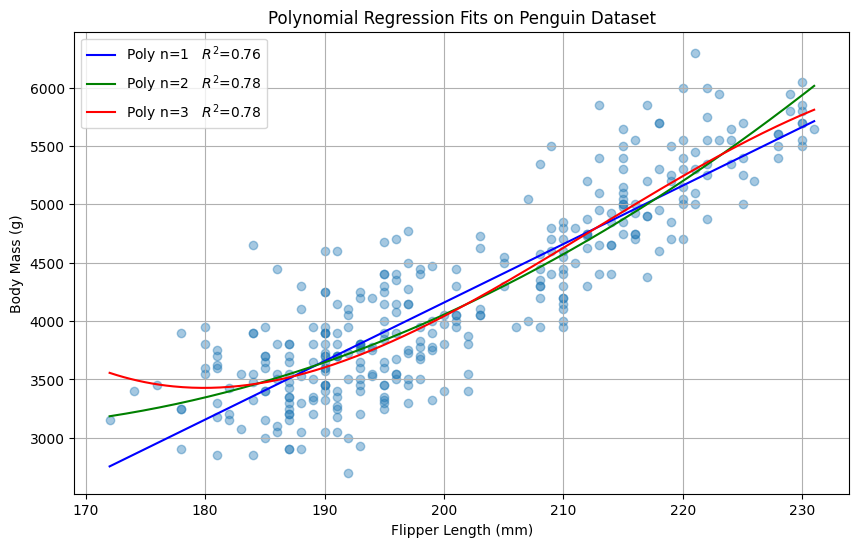

In [4]:
X = df["flipper_length_mm"].values.reshape(-1, 1)
y = df["body_mass_g"].values

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.4)

degrees = [1, 2, 3]
colors = ['blue', 'green', 'red']

for deg, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    r2 = model.score(X_poly, y)

    plt.plot(X_range, y_pred, color=color,
             label=f"Poly n={deg}   $R^2$={r2:.2f}")

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Polynomial Regression Fits on Penguin Dataset")
plt.legend()
plt.grid(True)

X = df["flipper_length_mm"]
y = df["body_mass_g"]

X = sm.add_constant(X)

lm = sm.OLS(y, X).fit()

print("R-squared value:",lm.rsquared)



Blue line (degree 1) → Linear regression fit

Green line (degree 2) → Curved fit, usually higher R²

Red line (degree 3) → More flexible curve, usually slightly higher R²

RESULT: About 76% of the variability in penguin body mass is explained by flipper length.



<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Multiple Regression
</span>
<span style="font-size: 20px;">

Extends linear regression by using several predictors to explain variation in the outcome.
</span>
</span>


----- OLS Regression Summary -----
                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Sun, 07 Dec 2025   Prob (F-statistic):          8.15e-104
Time:                        16:33:07   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
In

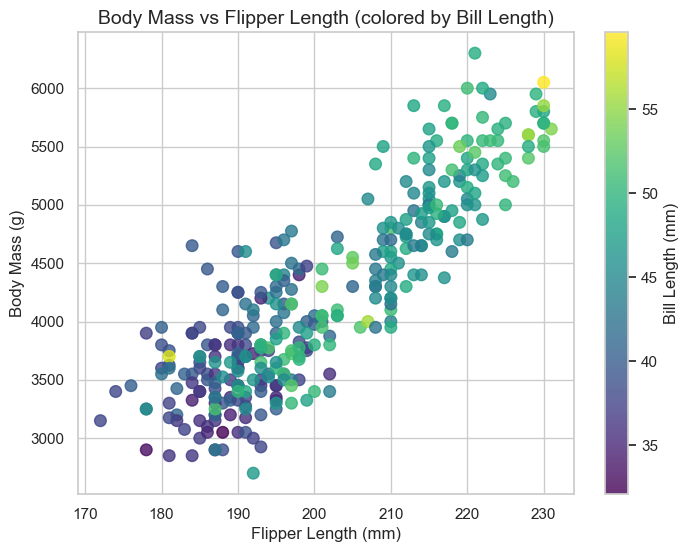

In [5]:
sns.set(style="whitegrid")  
mlr = smf.ols("body_mass_g ~ flipper_length_mm + bill_length_mm", data=df).fit()

print("\n----- OLS Regression Summary -----")
print(mlr.summary().as_text())

print("\n----- Coefficients (Params) -----")
print(mlr.params)

beta0 = mlr.params["Intercept"]
beta1 = mlr.params["flipper_length_mm"]
beta2 = mlr.params["bill_length_mm"]

print("\nIntercept (β0):", beta0)
print("Slope for flipper_length_mm (β1):", beta1)
print("Slope for bill_length_mm (β2):", beta2)

manual_pred = beta0 + beta1 * 200 + beta2 * 45
print("\nManual prediction for flipper=200mm & bill=45mm:", manual_pred)

df_new = pd.DataFrame({'flipper_length_mm':[200], 'bill_length_mm':[45]})
model_pred = mlr.predict(df_new)
print("Model prediction:", model_pred.values[0])

alpha = 0.05
print("\n----- Hypothesis Decision for Each Coefficient -----")
for term, p in mlr.pvalues.items():
    if p < alpha:
        print(f"{term}: p = {p:.4f} < {alpha} → Significant → Reject H₀")
    else:
        print(f"{term}: p = {p:.4f} ≥ {alpha} → Not Significant → Fail to reject H₀")

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df["flipper_length_mm"], 
    df["body_mass_g"],
    c=df["bill_length_mm"], 
    cmap="viridis",
    s=70, 
    alpha=0.8
)

plt.colorbar(scatter, label="Bill Length (mm)")
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Body Mass vs Flipper Length (colored by Bill Length)", fontsize=14)
plt.show()


<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
Hypothesis Testing
</span>
<span style="font-size: 30px;">

1.Z-Test
</span>
</span>

In [6]:
z_stat, pval = ztest(df["bill_length_mm"], value=45)

print("\nZ-Test Result:")
print("Z-statistic:", z_stat)
print("P-value:", pval)

# Decision rule
alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject the null hypothesis → Mean is significantly different from 45 mm.")
else:
    print("Conclusion: Fail to reject the null hypothesis → No significant difference from 45 mm.")



Z-Test Result:
Z-statistic: -3.360929138343159
P-value: 0.0007768075237057924
Conclusion: Reject the null hypothesis → Mean is significantly different from 45 mm.


<span style="font-family: 'Times New Roman';">
<span style="font-size: 30px;">
2.T-Test
</span>
</span>

In [7]:
male = df[df["sex"] == "Male"]["body_mass_g"]
female = df[df["sex"] == "Female"]["body_mass_g"]

t_stat, pval = stats.ttest_ind(male, female)

print("T-Test Result:")
print("T-statistic:", t_stat)
print("P-value:", pval)

# Decision rule
alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject the null hypothesis → Significant difference exists.")
else:
    print("Conclusion: Fail to reject the null hypothesis → No significant difference.")

T-Test Result:
T-statistic: 8.541720337994516
P-value: 4.897246751596224e-16
Conclusion: Reject the null hypothesis → Significant difference exists.


<span style="font-family: 'Times New Roman';">
<span style="font-size: 30px;">
3.ANOVA Test
</span>
</span>

In [8]:
adelie = df[df["species"] == "Adelie"]["body_mass_g"]
chinstrap = df[df["species"] == "Chinstrap"]["body_mass_g"]
gentoo = df[df["species"] == "Gentoo"]["body_mass_g"]

f_stat, pval = stats.f_oneway(adelie, chinstrap, gentoo)

print("\nANOVA Result:")
print("F-statistic:", f_stat)
print("P-value:", pval)

# Decision rule
alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject the null hypothesis → At least one group mean is different.")
else:
    print("Conclusion: Fail to reject the null hypothesis → All group means are similar.")



ANOVA Result:
F-statistic: 341.8948949481461
P-value: 3.744505126300443e-81
Conclusion: Reject the null hypothesis → At least one group mean is different.


<span style="font-family: 'Times New Roman';">
<span style="font-size: 30px;">
4.Chi-Squared Test
</span>
</span>

In [9]:
table = pd.crosstab(df["species"], df["island"])
chi2, pval, dof, expected = chi2_contingency(table)

print("\nChi-Square Test Result:")
print("Chi-square statistic:", chi2)
print("P-value:", pval)
print("Degrees of freedom:", dof)

# Decision rule
alpha = 0.05
if pval < alpha:
    print("Conclusion: Reject the null hypothesis → Variables are dependent (association exists).")
else:
    print("Conclusion: Fail to reject the null hypothesis → No association between variables.")



Chi-Square Test Result:
Chi-square statistic: 284.5900126880923
P-value: 2.2818915409873682e-60
Degrees of freedom: 4
Conclusion: Reject the null hypothesis → Variables are dependent (association exists).


<span style="font-family: 'Times New Roman';">
<span style="font-size: 40px;">
CONCLUSION
</span>
<span style="font-size: 20px;">

The Penguins dataset shows strong relationships among physical traits, supported by covariance, correlation, and regression results. Hypothesis tests confirm significant differences across sex, species, and islands, as well as deviations from assumed means. Overall, the dataset is consistent, meaningful, and provides clear statistical insights into penguin characteristics. 

The covariance and correlation analysis showed strong positive relationships among the penguin measurements, especially between flipper length and body mass. Using this, a simple linear regression confirmed a clear upward trend, with an R-squared of about 0.76, meaning flipper length alone explains most of the variation in body mass. Polynomial models (degrees 1–3) fit the data increasingly well, capturing more curvature and improving R² slightly. Multiple regression further strengthened the model by combining several predictors, giving a more complete explanation of body mass differences. Overall, the correlation results, regression models, fit evaluations, and statistical tests all support that these features are meaningful and reliable predictors of penguin body mass.
</span>
</span>